Case 4: Convergence Settings

This notebook will show the process of changing the convergence within the YAML settings file and illustrates the difference in the R-squared value for different convergence percentages.
This process can be replicated by downloading this notebook along with the minimum input folder and running each line in sequence.

In [1]:
import pandas as pd
import ruamel.yaml as yaml
import subprocess
import matplotlib.pyplot as plt
from scipy.stats import linregress

Case 1: Convergence = 10%

In [2]:
with open('settings.yml', 'r') as file:
    config = yaml.safe_load(file)

config['assignment']['number_of_iterations'] = 20
config['assignment']['UE_convergence_percentage'] = 10
            
with open('settings.yml', 'w') as file:
    yaml.dump(config, file, Dumper = yaml.RoundTripDumper)
    
print(yaml.dump(config['assignment'], Dumper=yaml.RoundTripDumper))

number_of_iterations: 20
route_output: 1
simulation_output: 0
UE_convergence_percentage: 10



Run DTALite executable

In [3]:
command = 'DTALite'
try:
    subprocess.run(command, shell=True, check=True)
    print("DTALite executed successfully.")
except subprocess.CalledProcessError as e:
    print(f"Error executing DTALite: {e}")

DTALite executed successfully.


Compare the volume (y-axis) against the UE perfect solution (x-axis) to obtain the R-squared value. 

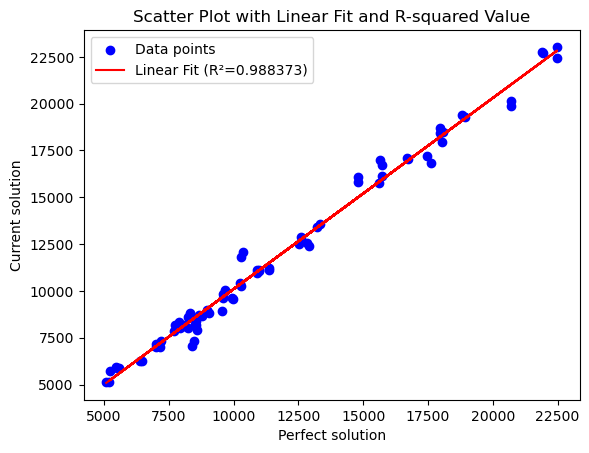

In [4]:
df_perfect = pd.read_excel('standard_solution_link_performance_comparison.xlsx')
df = pd.read_csv('link_performance.csv')
x = df_perfect['volume']
y = df['vehicle_volume']

slope, intercept, r_value, p_value, std_err = linregress(x, y)
r_squared = r_value**2
c_10 = r_squared

plt.scatter(x, y, label='Data points', color='blue')
plt.plot(x, intercept + slope*x, label=f'Linear Fit (R²={r_squared:4f})', color='red')
plt.title('Scatter Plot with Linear Fit and R-squared Value')
plt.xlabel('Perfect solution')
plt.ylabel('Current solution')
plt.legend()
plt.show()

Case 2: Convergence = 1%

In [5]:
config['assignment']['number_of_iterations'] = 20
config['assignment']['UE_convergence_percentage'] = 1

with open('settings.yml', 'w') as file:
    yaml.dump(config, file, Dumper = yaml.RoundTripDumper)
    
print(yaml.dump(config['assignment'], Dumper=yaml.RoundTripDumper))

number_of_iterations: 20
route_output: 1
simulation_output: 0
UE_convergence_percentage: 1



Run DTALite executable

In [6]:
try:
    subprocess.run(command, shell=True, check=True)
    print("DTALite executed successfully.")
except subprocess.CalledProcessError as e:
    print(f"Error executing DTALite: {e}")

DTALite executed successfully.


Compare the volume (y-axis) against the UE perfect solution (x-axis) to obtain the R-squared value. 

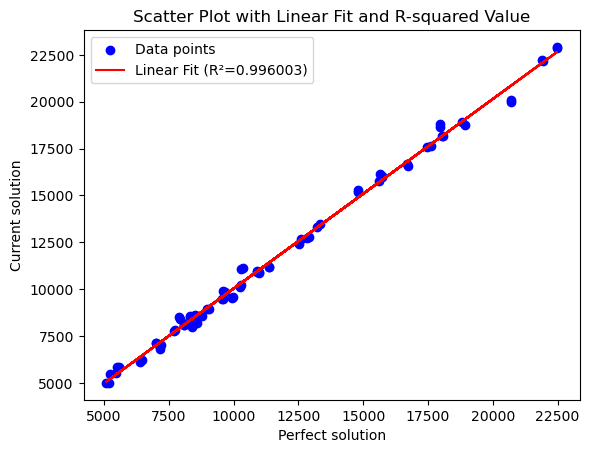

In [7]:
df_perfect = pd.read_excel('standard_solution_link_performance_comparison.xlsx')
df = pd.read_csv('link_performance.csv')
x = df_perfect['volume']
y = df['vehicle_volume']

slope, intercept, r_value, p_value, std_err = linregress(x, y)
r_squared = r_value**2
c_1 = r_squared

plt.scatter(x, y, label='Data points', color='blue')
plt.plot(x, intercept + slope*x, label=f'Linear Fit (R²={r_squared:4f})', color='red')
plt.title('Scatter Plot with Linear Fit and R-squared Value')
plt.xlabel('Perfect solution')
plt.ylabel('Current solution')
plt.legend()
plt.show()

Case 3: Convergence = 0.01%

In [8]:
config['assignment']['number_of_iterations'] = 20
config['assignment']['UE_convergence_percentage'] = 0.01

with open('settings.yml', 'w') as file:
    yaml.dump(config, file, Dumper = yaml.RoundTripDumper)
    
print(yaml.dump(config['assignment'], Dumper=yaml.RoundTripDumper))

number_of_iterations: 20
route_output: 1
simulation_output: 0
UE_convergence_percentage: 0.01



Run DTALite executable

In [9]:
try:
    subprocess.run(command, shell=True, check=True)
    print("DTALite executed successfully.")
except subprocess.CalledProcessError as e:
    print(f"Error executing DTALite: {e}")

DTALite executed successfully.


Compare the volume (y-axis) against the UE perfect solution (x-axis) to obtain the R-squared value. 

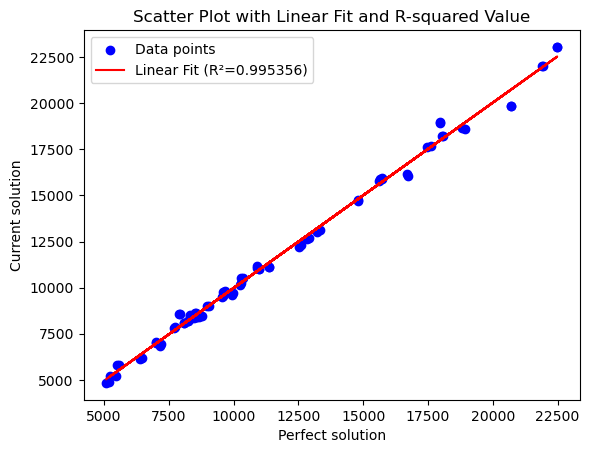

In [10]:
df_perfect = pd.read_excel('standard_solution_link_performance_comparison.xlsx')
df = pd.read_csv('link_performance.csv')
x = df_perfect['volume']
y = df['vehicle_volume']

slope, intercept, r_value, p_value, std_err = linregress(x, y)
r_squared = r_value**2
c_0_01 = r_squared

plt.scatter(x, y, label='Data points', color='blue')
plt.plot(x, intercept + slope*x, label=f'Linear Fit (R²={r_squared:4f})', color='red')
plt.title('Scatter Plot with Linear Fit and R-squared Value')
plt.xlabel('Perfect solution')
plt.ylabel('Current solution')
plt.legend()
plt.show()

Comparing the R-squared values side-by-side from all cases, it is clear that a lower convergence percentage, while difficult to achieve, often leads to higher accuracy.

In [11]:
print(f'The R-squared value for Case 1; 10% convergence = {c_10:4f}')
print(f'The R-squared value for Case 1; 1% convergence = {c_1:4f}')
print(f'The R-squared value for Case 1; 0.01% convergence = {c_0_01:4f}')

The R-squared value for Case 1; 10% convergence = 0.988373
The R-squared value for Case 1; 1% convergence = 0.996003
The R-squared value for Case 1; 0.01% convergence = 0.995356
